In [1]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import cv2
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.


In [2]:
data='D:/upsteer/Train'
categories=['jacket','helmet','shoes']

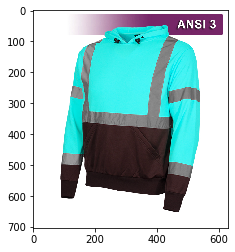

In [3]:
for category in categories:
    path=os.path.join(data,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break
      

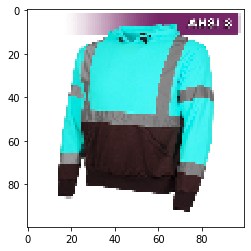

In [4]:
import cv2
IMG_SIZE=100
now_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(now_array)


In [5]:
training_data=[]
for category in categories:
    path=os.path.join(data,category)
    class_num=categories.index(category)
    for img in os.listdir(path):
        try:
            img_array=cv2.imread(os.path.join(path,img))
            now_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            training_data.append([now_array,class_num])
        except Exception as e:
            pass
            

In [6]:
training_data

[[array([[[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [254, 254, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [228, 213, 225],
          [255, 255, 255],
          [255, 255, 255]],
  
         ...,
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255

In [6]:
import random
random.shuffle(training_data)

In [7]:
for sample in training_data:
    print(sample[1])

0
2
0
1
0
1
2
1
1
1
2
1
1
2
1
1
1
0
1
2
0
0
1
1
1
1
0
0
0
2
0
0
1
0
1
0
1
2
0
2
2
0
0
1
1
0
0
0
1
2
1
0
1
1
2
0
2
0
0
0
1
0
2
1
0
1
0
0
1
0
1
1
2
1
0
2
2
1
1
2
2
2
1
0
1
2
1
1
1
0
1
2
1
2
0
0
1
0
1
1
0
0
1
2
0
0
0
2
1
2
1
1
1
0
0
1
2
0
1
0
2
0
1
1
0
2
1
1
0
1
0
0
1
1
1
2
1
2
0
1
0
1
0
1
2
2
0
2
1
0
0
1
0
1
2
2
2
1
1
2
2
1
0
1
1
2
0
2
1
2
0
1
1
2
2
2
0
0
0
2
1
2
0
1
1
0
1
1
0
2
1
1
0
0
0
2
2
1
0
2
0
1
1
0
2
2
1
0
1
2
1
1
0
2
1
0
0
0
0
2
1
1
1
1
0
1
1
1
0
1
2
2
0
1
1
1
0
2
2
0
0
0
2
2
0
2
1
0
1
2
1
1
0
2
0
0
1
2
0
0
2
1
1
0
1
1
0
2
0
0
0
2
2
1
1
0
2
2
1
2
1
0
2
0
2
2
1
0
1
2
1
2
1
0
0
0
0
0
0
1
0
2
2
2
2
0
2
0
0
2
2
1
0
1
2
1
0
0
1
1
2
1
0
1
2
1
0
0
1
2
2
0
1
0
1
2
2
1
0
1
0
2
1
1
1
0
2
0
2
1
0
2
0
1
0
0
0
1
2
2
0
0
1
1
0
0
0
1
0
1
0
1
0
0
2
0
2
1
2
0
2
0
2
1
0
0
2
0
0
2
1
1
0
0
0
2
2
2
0
1
2
0
1
0
0
0
0
1
2
0
2
2
1
1
2
0
0
1
1
1
0
2
2
1
1
0
0
0
0
1
1
0
2
2
0
0
1
0
0
2
1
2
1
0
0
0
2
0
2
2
2
0
1
0
0
2
0
2
1
0
0
1
2
0
0
1
0
0
1
0
0
1
1
2
0
1
0
0
0
2
1
1
0
1
0
2
2
2
2
0
1
2
1
0
2
0
0
0
1
1


In [8]:
sa=np.array(sample)

In [9]:
sa

array([array([[[ 38,  30,  31],
        [ 38,  30,  31],
        [ 38,  30,  31],
        ...,
        [225, 173,  53],
        [225, 173,  53],
        [225, 173,  53]],

       [[ 47,  39,  40],
        [ 47,  39,  40],
        [ 47,  39,  40],
        ...,
        [225, 173,  53],
        [225, 173,  53],
        [225, 173,  53]],

       [[ 42,  34,  35],
        [ 42,  34,  35],
        [ 42,  34,  35],
        ...,
        [225, 173,  53],
        [225, 173,  53],
        [225, 173,  53]],

       ...,

       [[225, 173,  53],
        [225, 173,  53],
        [225, 173,  53],
        ...,
        [225, 173,  53],
        [225, 173,  53],
        [225, 173,  53]],

       [[225, 173,  53],
        [225, 173,  53],
        [225, 173,  53],
        ...,
        [225, 173,  53],
        [225, 173,  53],
        [225, 173,  53]],

       [[225, 173,  53],
        [225, 173,  53],
        [225, 173,  53],
        ...,
        [225, 173,  53],
        [225, 173,  53],
        [225, 173

In [8]:
x=[]
y=[]

In [9]:
for features,label in training_data:
    x.append(features)
    y.append(label)


In [10]:
x=np.array(x)

In [11]:
y=np.array(y)

In [12]:
x.shape

(1277, 100, 100, 3)

In [13]:
x_train=x/255

In [14]:
y.shape

(1277,)

In [15]:
import pickle
pickle_out=open('x.pickle','wb')
pickle.dump(x_train,pickle_out)
pickle_out.close()

pickle_out=open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()

In [16]:
pickle_in=open('x.pickle','rb')
x=pickle.load(pickle_in)
y=pickle.load(open('y.pickle','rb'))

In [17]:
model = Sequential()
model.add(Conv2D(input_shape=(x_train.shape[1:]),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=6500,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=3, activation="softmax"))

In [19]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(x_train.shape[1:])))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(120,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [20]:
x_train.shape
              
              

(1277, 100, 100, 3)

In [21]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
out=model.fit(x_train,y,epochs=1)

Epoch 1/1
1277/1277 [==============================] - 23s 18ms/step - loss: 0.9884 - accuracy: 0.4800


In [22]:
categ_test=['jacket','helmet','shoe']

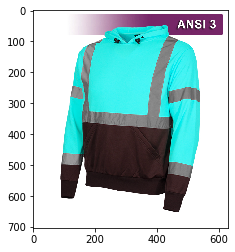

In [23]:
for category in categ_test:
    path=os.path.join(data,category)
    for img in os.listdir(path):
        img_array2=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array2)
        plt.show()
        break
    break
      

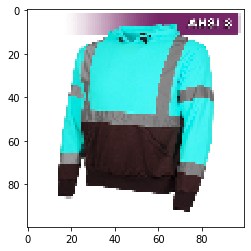

In [25]:
IMG_SIZE=100
now_array2=cv2.resize(img_array2,(IMG_SIZE,IMG_SIZE))
ww=plt.imshow(now_array2)
x_test=np.array(now_array2).reshape(-1,IMG_SIZE,IMG_SIZE,3)

In [26]:
x_test.shape

(1, 100, 100, 3)

In [23]:
import cv2,time
import numpy as np
from matplotlib import cm
cap = cv2.VideoCapture(0)
a=1
while(True):
    a=a+1
    # Capture frame-by-frame
    ret, frame = cap.read()
    fr=cv2.resize(frame,(100,100))
    cv2.imshow('capture',fr)
    # Our operations on the frame come here
    g=np.array(fr).reshape(1,100,100,3)
    result=model.predict(g)
    from PIL import Image
     result1 = Image.fromarray(np.uint8(cm.gist_earth(result)*255))
    cv2.imshow(result1)
    tl = (result1[0]['topleft']['x'], result1[0]['topleft']['y'])
    br = (result1[0]['bottomright']['x'], result1[0]['bottomright']['y'])
    label = result1[0]['label']
    # add the box and label and display it
    img = cv2.rectangle(img, tl, br, (0, 255, 0), 7)
    img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
    plt.imshow(img)
    plt.show()

    
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

TypeError: imshow() missing required argument 'mat' (pos 2)